# Day 6 - Natural Language Processing

In [1]:
from nltk import download

In [2]:
download('punkt')
download('wordnet')
download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/efeacikgoz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/efeacikgoz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/efeacikgoz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
text ="Yaylaya gitmişti yayla zamanı, Gülizar döndü de Döndü dönmedi."

In [4]:
text.split()

['Yaylaya',
 'gitmişti',
 'yayla',
 'zamanı,',
 'Gülizar',
 'döndü',
 'de',
 'Döndü',
 'dönmedi.']

## Tokenize - split the words of a text into a python array

sent_tokenize tokenizes sentences.

In [5]:
from nltk.tokenize import sent_tokenize as st

In [6]:
sentence = "Welcome readers. I hope you find it interesting. Please do reply."

In [7]:
st(sentence)

['Welcome readers.', 'I hope you find it interesting.', 'Please do reply.']

In [8]:
from nltk.tokenize import word_tokenize as wt

In [9]:
wt(sentence)

['Welcome',
 'readers',
 '.',
 'I',
 'hope',
 'you',
 'find',
 'it',
 'interesting',
 '.',
 'Please',
 'do',
 'reply',
 '.']

In [10]:
from nltk.tokenize import TreebankWordTokenizer

In [11]:
tknzr = TreebankWordTokenizer()
tknzr.tokenize(sentence)

['Welcome',
 'readers.',
 'I',
 'hope',
 'you',
 'find',
 'it',
 'interesting.',
 'Please',
 'do',
 'reply',
 '.']

This tokenizer does not include the dots in the midlle of the text.

In [12]:
from nltk.tokenize import WordPunctTokenizer

In [13]:
tk = WordPunctTokenizer()

In [14]:
tk.tokenize("Don't heistate to ask questions.")

['Don', "'", 't', 'heistate', 'to', 'ask', 'questions', '.']

In [15]:
from nltk.tokenize import BlanklineTokenizer

In [16]:
blt = BlanklineTokenizer()

sent = '''
Hello miss

I saw that I got an unexpected grade from the midterm. I would like to know if I can see my paper.

with respect
student
'''

In [17]:
blt.tokenize(sent)

['\nHello miss',
 'I saw that I got an unexpected grade from the midterm. I would like to know if I can see my paper.',
 'with respect\nstudent\n']

In [18]:
from nltk.tokenize import RegexpTokenizer

In [19]:
sent = "She secures 90.56% in class X. She is a meritorious student."

In [20]:
tkn = RegexpTokenizer('[A-Z]\w+') # Regex that matches all the words that start with a capital letter.

In [21]:
tkn.tokenize(sent)

['She', 'She']

### Lemma & Stemma

Remove the prefixes and find the stem of a word.

#### Stemma: Remove the prefixes

In [22]:
from nltk.stem import PorterStemmer

In [23]:
pr = PorterStemmer()

In [24]:
pr.stem('talking')

'talk'

Removed the 'ing' prefix.

In [25]:
pr.stem('happiness')

'happi'

In [26]:
pr.stem('geliyorlar')

'geliyorlar'

Did not work on a turkish word.

In [27]:
pr.stem('welcome')

'welcom'

In [28]:
words = [
    'houses', 'trains', 'pens', 'cars', 'eaten', 'sick', 'bought', 'selling', 'sized', 'speech', 'rolling', 'marching',
    'identification', 'universal', 'beautiful', 'references'
]

In [29]:
stems = [pr.stem(word) for word in words]

In [30]:
stems

['hous',
 'train',
 'pen',
 'car',
 'eaten',
 'sick',
 'bought',
 'sell',
 'size',
 'speech',
 'roll',
 'march',
 'identif',
 'univers',
 'beauti',
 'refer']

#### Lemma: Find the stem

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
lm = WordNetLemmatizer()

In [33]:
lm.lemmatize('working', pos='v') # Needs nltk.download('wordnet')

'work'

pos -> part of speech. The 'v' argument means we are searching for a verb from this token.
1. Tagging Adjective
2. Averb
3. Conjunction
4. And, or
5. Preposition

In [34]:
stems_v = [lm.lemmatize(word, pos='v') for word in words]

In [35]:
stems_v

['house',
 'train',
 'pen',
 'cars',
 'eat',
 'sick',
 'buy',
 'sell',
 'size',
 'speech',
 'roll',
 'march',
 'identification',
 'universal',
 'beautiful',
 'reference']

#### Pos Tagging

POS Tagging (Parts of Speech Tagging) is a process to mark up the words in text format for a particular part of a speech based on its definition and context. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word. It is also called grammatical tagging.

In [36]:
from nltk import pos_tag

In [37]:
text = "It is a rather pleasent day today!"
tokenized = wt(text)
pos_tag(tokenized)

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('rather', 'RB'),
 ('pleasent', 'JJ'),
 ('day', 'NN'),
 ('today', 'NN'),
 ('!', '.')]

##### Pos tagging abbreviations

In [38]:
import pandas as pd
from requests import get
from warnings import filterwarnings

filterwarnings('ignore')

In [39]:
link = "https://www.guru99.com/pos-tagging-chunking-nltk.html"
rq = get(link)

In [40]:
pos_df = pd.read_html(rq.text)[0]
pos_df

,Abbreviation,Meaning
0,CC,coordinating conjunction
1,CD,cardinal digit
2,DT,determiner
3,EX,existential there
4,FW,foreign word
5,IN,preposition/subordinating conjunction
6,JJ,This NLTK POS Tag is an adjective (large)
7,JJR,"adjective, comparative (larger)"
8,JJS,"adjective, superlative (largest)"
9,LS,list market


Using this table we can write a function that takes a sentence and provides the pos tag and its meaning for all the words.

In [41]:
def explain_pos(sentence):
    tokenized = wt(text)
    tags = pos_tag(tokenized)
    for tag in tags:
        str = tag[0]
        abbv = tag[1]
        # meaning = pos_df.loc[pos_df['Abbreviation'] == abbv, 'Meaning']
        meaning = pos_df[pos_df['Abbreviation'] == abbv]['Meaning']
        print(f"{str}: {meaning}")

In [42]:
explain_pos(text)

It: 17    personal pronoun (hers, herself, him, himself)
Name: Meaning, dtype: object
is: 30    verb, present tense with 3rd person singular (...
Name: Meaning, dtype: object
a: 2    determiner
Name: Meaning, dtype: object
rather: 19    adverb (occasionally, swiftly)
Name: Meaning, dtype: object
pleasent: 6    This NLTK POS Tag is an adjective (large)
Name: Meaning, dtype: object
day: 11    noun, singular (cat, tree)
Name: Meaning, dtype: object
today: 11    noun, singular (cat, tree)
Name: Meaning, dtype: object
!: Series([], Name: Meaning, dtype: object)


This is a proof of concept, it could be imporved further.

#### Autocorrect

In [43]:
from autocorrect import spell

In [44]:
bad = "My splilling is gopopd"

In [45]:
spell(bad)

autocorrect.spell is deprecated,             use autocorrect.Speller instead


'My spilling is good'

##### Use the new version as per the warning

In [46]:
from autocorrect import Speller

In [47]:
spell = Speller()

In [48]:
spell(bad)

'My spilling is good'

In [49]:
from textblob import TextBlob

In [50]:
blob = TextBlob('I hgave goad speling.')

In [51]:
blob.correct()

TextBlob("I have good spelling.")

In [52]:
from langdetect import detect

In [53]:
detect('Merhaba dünya!')

'tr'

In [54]:
detect('Ich komme auf der Türkei.')

'de'

In [55]:
detect('Hola, como te llamas?')

'es'

In [56]:
detect('Ich bin 12312 jahre alt.')

'de'

In [57]:
detect('Ich gehe nach hous')

'de'

#### Translating

In [58]:
en = TextBlob('I am a free black man from Africa')

In [59]:
tr = en.translate(from_lang='en', to='tr')

In [60]:
tr

TextBlob("Afrika'dan özgür bir siyah adamım")

In [61]:
tr = TextBlob('Cok uykum var.')

In [62]:
en = tr.translate(from_lang='tr', to='en')

In [63]:
en

TextBlob("I am very tired.")

## Starting an NLP project

1. Convert all to lowecase
2. Remove punctiation
3. Remove numbers
4. Remove newline characters
5. Remove stopwords (unnecessary words)
6. Tokenize
7. use Lemma & Stemma to get the stem of the words
8. Vectorize

<strong>TF/IDF<strong/> term frequency / inverse document frequency

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [65]:
cv = CountVectorizer()
tfidfv = TfidfVectorizer()

In [66]:
sentences = ["Call you tonight.", "Call me a cab.", "Please call me... PLEASE.", "Please stand by"]

In [67]:
tf = pd.DataFrame(cv.fit_transform(sentences).toarray(), columns=cv.get_feature_names_out())

In [68]:
tf

,by,cab,call,me,please,stand,tonight,you
0,0,0,1,0,0,0,1,1
1,0,1,1,1,0,0,0,0
2,0,0,1,1,2,0,0,0
3,1,0,0,0,1,1,0,0


###### Document Frequency

In [69]:
df = cv.fit_transform(sentences).toarray().sum(axis=0)
df

array([1, 1, 3, 2, 3, 1, 1, 1])

###### tf/idf

In [70]:
tf/df

,by,cab,call,me,please,stand,tonight,you
0,0.0,0.0,0.333333,0.0,0.000000,0.0,1.0,1.0
1,0.0,1.0,0.333333,0.5,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.333333,0.5,0.666667,0.0,0.0,0.0
3,1.0,0.0,0.000000,0.0,0.333333,1.0,0.0,0.0


# Yelp data project

In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('yelp.csv')

In [73]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [75]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [76]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

### Convert all the text to lowercase

In [77]:
df['text'] = df['text'].str.lower()

In [78]:
df['text']

0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate. rice is so good and i als...
3       rosie, dakota, and i love chaparral dog park!!...
4       general manager scott petello is a good egg!!!...
                              ...                        
9995    first visit...had lunch here today - used my g...
9996    should be called house of deliciousness!\r\n\r...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. i think...
Name: text, Length: 10000, dtype: object

### Remove punctuation

In [79]:
df['text'] = df['text'].str.replace('[^\w\w]', '')

In [80]:
df['text']

0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate. rice is so good and i als...
3       rosie, dakota, and i love chaparral dog park!!...
4       general manager scott petello is a good egg!!!...
                              ...                        
9995    first visit...had lunch here today - used my g...
9996    should be called house of deliciousness!\r\n\r...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. i think...
Name: text, Length: 10000, dtype: object

In [81]:
df.text[0]

'my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\ndo yourself a favor and get their bloody mary.  it was phenomenal and simply the best i\'ve ever had.  i\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.\r\n\r\nwhile everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i\'ve ever had.\r\n\r\nanyway, i can\'t wait to go back!'

### Remove newline

In [82]:
df['text'] = df['text'].str.replace('\n', '')

### Remove numerical values

In [83]:
df['text'] = df['text'].str.replace('\d+', '')

In [84]:
df.text[0]

'my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.\r\rdo yourself a favor and get their bloody mary.  it was phenomenal and simply the best i\'ve ever had.  i\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.\r\rwhile everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i\'ve ever had.\r\ranyway, i can\'t wait to go back!'

In [85]:
df['text'] = df['text'].str.replace('\r', '')

In [86]:
import seaborn as sns

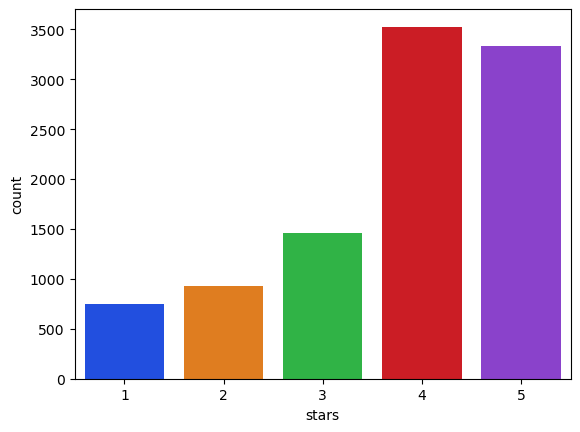

In [87]:
sns.countplot(x=df['stars'], palette='bright');

4 & 5 scores will be positive, 1 & 2 will be negative. 0 will be neutral.

### Sentiment Analysis

In [88]:
yelpbw = df[(df.stars == 1) | (df.stars == 5)]

In [89]:
yelpbw.reset_index(drop=True, inplace=True)

In [90]:
yelpbw.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"rosie, dakota, and i love chaparral dog park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop what you're doing and drive here. after i...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [106]:
from nltk.stem import PorterStemmer

In [107]:
def lemmafn(text):
    words = TextBlob(text).words
    pr = PorterStemmer()
    
    return [pr.stem(word) for word in words]

In [120]:
cv = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10_000, analyzer=lemmafn)

In [121]:
x = yelpbw['text']
y = yelpbw['stars']

In [122]:
x = cv.fit_transform(x)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)

In [127]:
lr = LogisticRegression()

In [128]:
pred = lr.fit(x_train, y_train).predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
accuracy_score(pred, y_test)

0.921760391198044

In [131]:
from textblob import TextBlob

TextBlob('I hate you.').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [104]:
TextBlob("I love you").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [105]:
TextBlob("You are the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)